In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#importing the dataset
df=pd.read_csv("data.csv")

In [52]:
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


#data analysis

In [53]:
df.isna().sum()

x    0
y    0
dtype: int64

<Axes: xlabel='x', ylabel='y'>

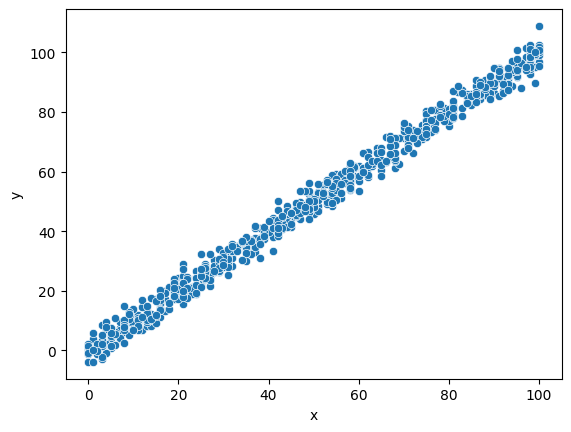

In [56]:
sns.scatterplot(data=df,x='x',y='y')

In [103]:
#converting to numpy array
df=np.array(df)
xtrain=df[:500,:1]
ytrain=df[:500,1:]
xtest=df[500:,:1]
ytest=df[500:,1:]

In [106]:
print(f"the shape of xtrain is {xtrain.shape}, the shape of ytrain is {ytrain.shape}")
print(f"the shape of xtest is {xtest.shape} and the shape of ytest is {ytest.shape}")

the shape of xtrain is (500, 1), the shape of ytrain is (500, 1)
the shape of xtest is (199, 1) and the shape of ytest is (199, 1)


In [57]:
#defining the cost function
def compute_cost(x,y,w,b):
    #we will compute cost for the entire data set
    m=len(x)
    cost=0
    for k in range(m):
        cost+=((w*x[k]+b)-y[k])**2
    cost=cost/(2*m)
    return cost

In [58]:
#testing the above function
x=[1,2,3]
y=[1,2,3]
w=0
b=0
print(compute_cost(x,y,w,b))

2.3333333333333335


#the above cost function is working properly

In [59]:
def compute_gradient(x,y,w,b):
    dj_dw=0
    dj_db=0
    m=len(x)
    for k in range(m):
        dj_dw+=((w*x[k]+b)-y[k])*(x[k])
        dj_db+=((w*x[k]+b)-y[k])
    dj_dw=dj_dw/(2*m)
    dj_db=dj_db/(2*m)
    return [dj_dw,dj_db]


In [63]:
#testing the above function
#for the test data set and w=1 and b=0 it should give inf value theoretically
q,w=compute_gradient(x,y,1,0)
print(f"the  value of dj_dw is {q}")
print(f"the value of dj_db is {w}")

the  value of dj_dw is 0.0
the value of dj_db is 0.0


#the descent algo is working as expected

In [110]:
#code for gradient descent algorithm
def gradient_descent(x,y,w,b,alpha,no_of_iter):
    cost_hist=[]
    gradient_hist=[]
    w_b_hist=[]
    for k in range(no_of_iter):
        #computing the gradient values and appending it 
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        gradient_hist.append([dj_dw,dj_db])
        #computing the cost and storing it
        cost=compute_cost(x,y,w,b)
        cost_hist.append(cost)
        #performing simultaneous update
        #storinng the w and b values before update
        w_b_hist.append([w,b])
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db) 
    return w,b,cost_hist,gradient_hist,w_b_hist
        

#function to break the loop when it converges

In [176]:
#performing gradient descent with given parameter
init_w=0
init_b=0
init_alpha=(1/100)
init_no_of_iter=200
wfinal,bfinal,cost_hist,gradient_hist,w_b_hist=gradient_descent(x,y,init_w,init_b,init_alpha,init_no_of_iter)


In [177]:
wfinal

0.8532079166873364

Text(0.5, 0, 'iteration')

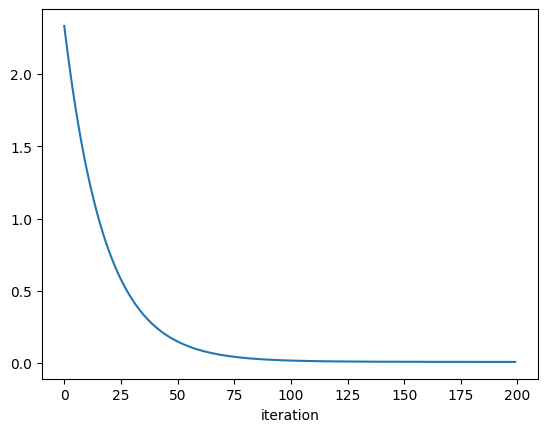

In [178]:
#ploting cost vs iter graph
plt.plot([k for k in range(len(cost_hist))], cost_hist)
plt.xlabel("iteration")


In [179]:
#function to plot dj_dw vs iter and dj_db vs iter
a=[]
b=[]
for i in range(len(gradient_hist)):
    a.append(gradient_hist[i][0])
for i in range(len(gradient_hist)):
    b.append(i)

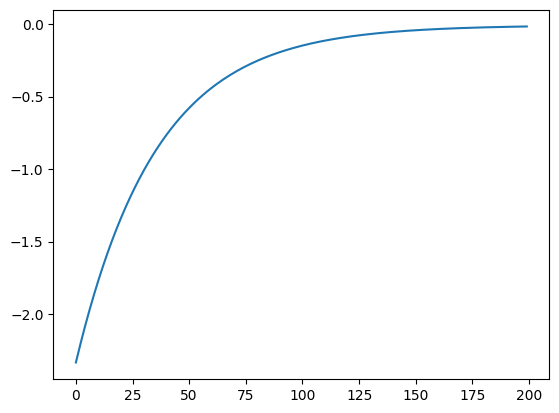

In [180]:
plt.plot(b,a)

In [181]:
#function to plot dj_dw vs iter and dj_db vs iter
a=[]
b=[]
for i in range(len(gradient_hist)):
    a.append(gradient_hist[i][1])
for i in range(len(gradient_hist)):
    b.append(i)

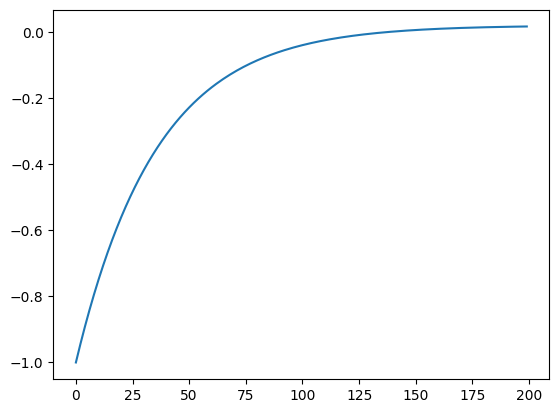

In [182]:
plt.plot(b,a)

In [183]:
for k in range(1000,1100):
    print(f"the value of djdw is {gradient_hist[k][0]} and the value of djdb is {gradient_hist[k][1]}")

IndexError: list index out of range

In [ ]:
#getting the output and checking it with actual value
for k in range(100):
    print(f"the pridicted value is {wfinal*xtest[k] + bfinal} and the actual value is {ytest[k]}" )
    print(f"the value of the cost function is {compute_cost(xtest,ytest,wfinal,bfinal)}")

the pridicted value is [4.97811625] and the actual value is [7.68202459]
the value of the cost function is [4.14090189]
the pridicted value is [60.52868627] and the actual value is [61.01858089]
the value of the cost function is [4.14090189]
the pridicted value is [46.64104376] and the actual value is [53.60562216]
the value of the cost function is [4.14090189]
the pridicted value is [97.23174145] and the actual value is [94.47728801]
the value of the cost function is [4.14090189]
the pridicted value is [29.77747786] and the actual value is [27.9645947]
the value of the cost function is [4.14090189]
the pridicted value is [62.51263519] and the actual value is [62.55662585]
the value of the cost function is [4.14090189]
the pridicted value is [0.01824393] and the actual value is [1.40625441]
the value of the cost function is [4.14090189]
the pridicted value is [99.21569038] and the actual value is [101.7003412]
the value of the cost function is [4.14090189]
the pridicted value is [17.87

In [ ]:
#checking the cost value 
for k in range(len(cost_hist)):
    if k%10==0:
        print(f"the value of the cost is {cost_hist[k]}")

the value of the cost is 2.3333333333333335
the value of the cost is 1.3335913544339733
the value of the cost is 0.7638971860416106
the value of the cost is 0.4392416076352071
the value of the cost is 0.2542077499355147
the value of the cost is 0.1487298668370435
the value of the cost is 0.08858294119632693
the value of the cost is 0.05426580895483025
the value of the cost is 0.034666846877831385
the value of the cost is 0.023454729070056274
the value of the cost is 0.0170219071839527
the value of the cost is 0.013312820909363246
the value of the cost is 0.011156221123130632
the value of the cost is 0.009884732640702372
the value of the cost is 0.009118083932517928
the value of the cost is 0.008639593045933631
the value of the cost is 0.008325790211654633
the value of the cost is 0.008106317333346588
the value of the cost is 0.00794107901756894
the value of the cost is 0.007807223401637132
the value of the cost is 0.00769172392642179
the value of the cost is 0.007587152485455144
the va